# Project 1 The objective of project 1 is to implement different clustering methods to synthetic and real-world data and validate using external and internal validation techniques

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sn
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics as m
from sklearn import preprocessing
!pip install validclust
from validclust import ValidClust
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster import hierarchy as sch

## Task 1

Uploading datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Importing and reading datasets

In [3]:
df_1 = pd.read_csv('Data1.csv', index_col=0).reset_index(drop = True)
df_2 = pd.read_csv('Data2.csv', index_col=0).reset_index(drop = True)
df_3 = pd.read_csv('Data3.csv', index_col=0).reset_index(drop = True)
df_4 = pd.read_csv('Data4.csv', index_col=0).reset_index(drop = True)
df_5 = pd.read_csv('Data5.csv', index_col=0).reset_index(drop = True)
df_6 = pd.read_csv('Data6.csv', index_col=0).reset_index(drop = True)
df_7 = pd.read_csv('Data7.csv', index_col=0).reset_index(drop = True)
df_8 = pd.read_csv('Data8.csv', index_col=0).reset_index(drop = True)
df_6

,X1,X2,Class
0,1.388261,2.076096,1
1,2.177247,3.102304,1
2,0.378645,5.307610,1
3,3.681732,1.622681,1
4,2.462861,2.777897,1
...,...,...,...
4091,0.909687,0.375763,2
4092,2.698381,0.511262,2
4093,1.078797,1.526153,2
4094,1.974889,-0.649343,2


Custom function to generate clusters using K-means clustering algorithm

In [4]:
def K_Means(DataFrame):
    
    df = DataFrame.copy()
    n = len(df.columns)- 1
    
                                           # Renaming Classes
    df.Class = df.Class - 1
    
                                           # Developing model
    model = KMeans(n_clusters = len(df.Class.unique()), tol = 1e-8, n_init = 10, random_state=0).fit(df.iloc[:,0:n])
    
    return model

Custom function to generate clusters using hierarchial clustering algorithm

In [5]:
def Hierarchical(DataFrame):
    
    df = DataFrame.copy()
    n = len(df_5.columns)- 1
                                           # Renaming Classes
    df.Class = df.Class - 1
    
                                           # Developing model
    model = AgglomerativeClustering(distance_threshold = None, linkage = 'ward', n_clusters = len(df.Class.unique())).fit(df.iloc[:,0:n])
        
        
    return model

External validation

In [6]:
def Evaluation(df, model):
    n = len(df.columns)- 1
    
    print('\n                                 External Validation: Matching set\n\n')
    print('Confusion_matrix:           \n', m.confusion_matrix(df.Class, model.labels_))
    print('\nMultilabel_Confusion_Matrix:\n', m.multilabel_confusion_matrix(df.Class, model.labels_))
    contingency_matrix = m.cluster.contingency_matrix(df.Class, model.labels_)
    print('\nPurity_score:            ', np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix))
    
    print('Precision_score:         ', m.precision_score(df.Class, model.labels_, average='micro'))
    print('Recall_score:            ', m.recall_score(df.Class, model.labels_, average='micro'))
    print('Accuracy score:          ', m.accuracy_score(df.Class, model.labels_))
    print('F_Measure:               ', m.f1_score(df.Class, model.labels_, average='micro'))
    
    print('\n\n                              External Validation: Peer to peer corelation\n\n')
    print('Jaccard_score:           ', m.jaccard_score(df.Class, model.labels_, average='micro'))
    print('Rand_score:              ', m.rand_score(df.Class, model.labels_))
    print('Fowlkes_Mallows_score:   ', m.fowlkes_mallows_score(df.Class, model.labels_))

Equations for the evaluation metrics

Contingency table:
TP : The number of data pairs found in the same cluster,
both in C and in P.
FP: The number of data pairs found in the same cluster in
C but in different clusters in P.
FN : The number of data pairs found in different clusters
in C but in the same cluster in P.
FN : The number of data pairs found in different clusters
in C but in the same cluster in P.
where,
C = {C1,C2,...,Cm} is result of clustering algorithm
P = {P1,P2,...,Ps} prior knowledge of the data in the
form of class labels, the results obtained by another clustering
algorithm, or simply a grouping considered to be correct.

Precision

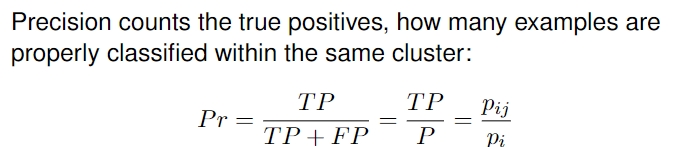

Purity Score

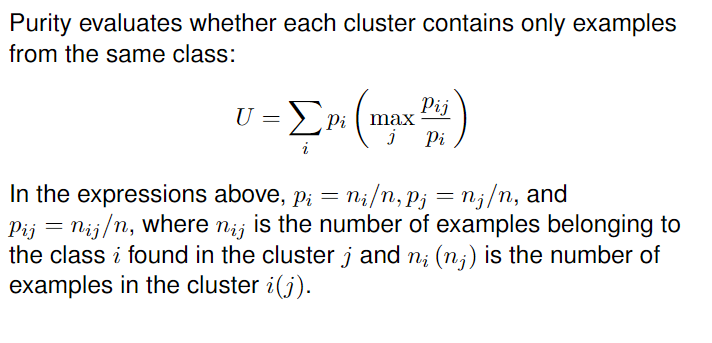

Recall Score

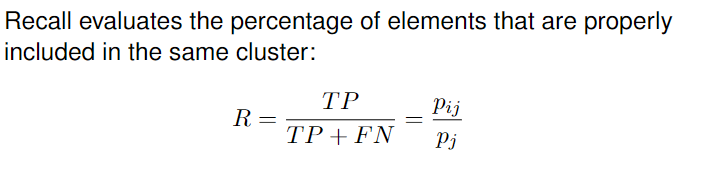

Accuracy

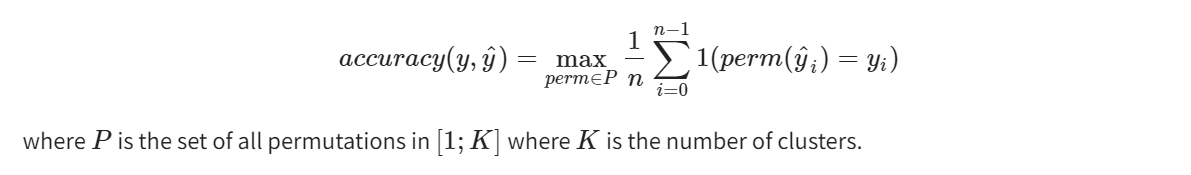

F1 score

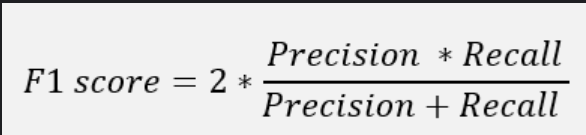

Jaccard coefficient

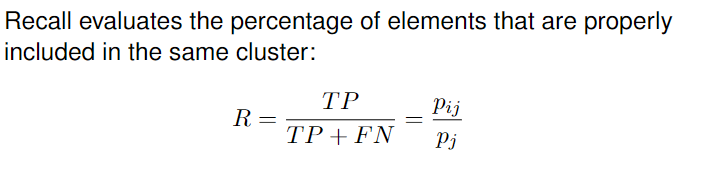

Rand coefficient

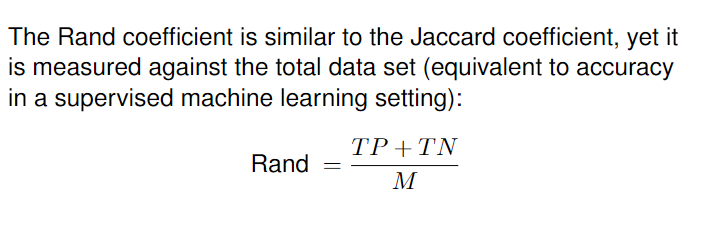

Folkes and Mallows coefficient

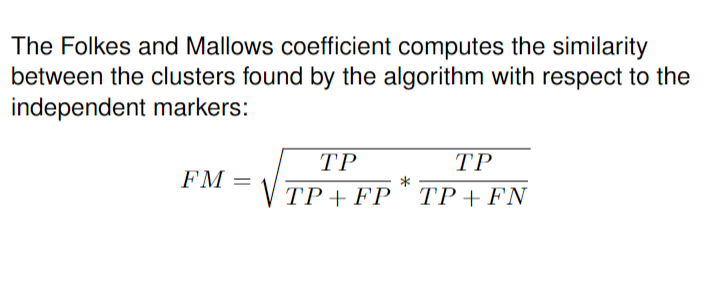

In [7]:
# dataset 8 has only 1 class hence making a clustering algorithm doesn't make any sense.
df_8.Class

0       1
1       1
2       1
3       1
4       1
       ..
3997    1
3998    1
3999    1
4000    1
4001    1
Name: Class, Length: 4002, dtype: int64

Plotting the data

In [61]:
#%matplotlib widget
def plot(df):
    k = K_Means(df)
    h = Hierarchical(df)
    set = sn.color_palette('tab10', len(df.Class.unique()))
    
    if len(df.columns) == 4:
        fig = plt.figure(figsize=(20,20))
        ax = fig.add_subplot(1, 3, 1, projection='3d')
        s1 = ax.scatter3D(xs = df.iloc[:,0], ys = df.iloc[:,1], zs = df.iloc[:,2], c = df.Class-1, cmap = 'jet')
        ax.legend(*s1.legend_elements())
        plt.title('Orignal Class')
        
        ax = fig.add_subplot(1, 3, 2, projection='3d')
        s2 = ax.scatter3D(xs = df.iloc[:,0], ys = df.iloc[:,1], zs = df.iloc[:,2], c = k.labels_, cmap = 'jet')
        ax.legend(*s2.legend_elements())
        plt.title('Class predicted by Kmeans')
        
        ax = fig.add_subplot(1, 3, 3, projection='3d')
        s3 = ax.scatter3D(xs = df.iloc[:,0], ys = df.iloc[:,1], zs = df.iloc[:,2], c = h.labels_, cmap = 'jet')
        ax.legend(*s3.legend_elements())
        plt.title('Class predicted by Hierarchical ')
        
    else:
        fig, axes = plt.subplots(1, 3, figsize=(20,5))

        sn.scatterplot(x = df.iloc[:,0], y = df.iloc[:,1], hue = df.Class-1, palette = set, ax=axes[0]).set(title = 'Orignal Class')
        sn.scatterplot(x = df.iloc[:,0], y = df.iloc[:,1], hue = k.labels_, palette = set, ax=axes[1]).set(title = 'Class predicted by Kmeans')
        sn.scatterplot(x = df.iloc[:,0], y = df.iloc[:,1], hue = h.labels_, palette = set, ax=axes[2]).set(title = 'Class predicted by Hierarchical')
                
    plt.show()

Runing code for all datasets:
Displaying evaluation metrics for each dataset and Plotting for given data, kmeans and hierarchical respectively.

df_1
***********************************************************************************************************************

                                      Evaluating K_Means model

***********************************************************************************************************************

                                 External Validation: Matching set


Confusion_matrix:           
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0 30  0  0  0]
 [ 0  0 30  0  0  0  0  0]
 [30  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0]]

Multilabel_Confusion_Matrix:
 [[[182  30]
  [  0   0]]

 [[150  30]
  [ 32   0]]

 [[152  30]
  [ 30   0]]

 [[150  32]
  [ 30   0]]

 [[182   0]
  [  0  30]]

 [[152  30]
  [ 30   0]]

 [[152  30]
  [ 30   0]]

 [[182   0]
  [ 30   0]]]

Purity_score:             1.0
Precision_score:          0.14150943396226415
Recall_score:             0.14150943396226415
Accuracy sc

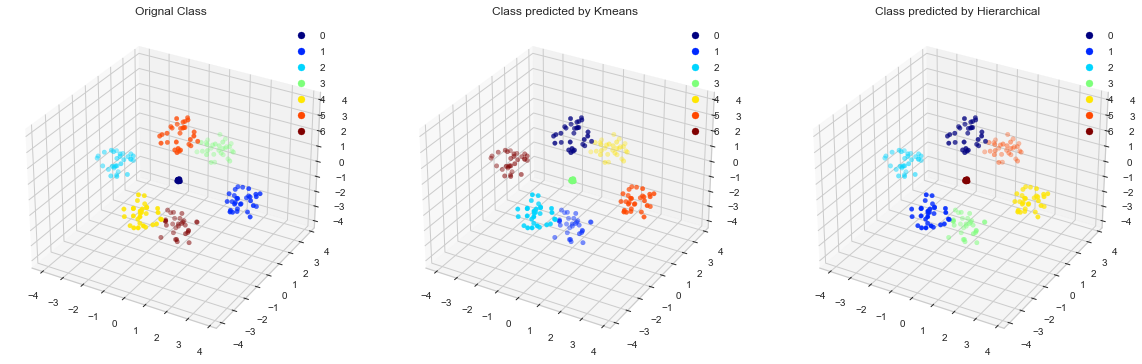

df_2
***********************************************************************************************************************

                                      Evaluating K_Means model

***********************************************************************************************************************

                                 External Validation: Matching set


Confusion_matrix:           
 [[  0   0   0   0   0]
 [ 83   0 117   0   0]
 [  0   0  24  76   0]
 [  0 100   0   0   0]
 [  0   0   0   4   0]]

Multilabel_Confusion_Matrix:
 [[[321  83]
  [  0   0]]

 [[104 100]
  [200   0]]

 [[187 117]
  [ 76  24]]

 [[224  80]
  [100   0]]

 [[400   0]
  [  4   0]]]

Purity_score:             0.9306930693069307
Precision_score:          0.0594059405940594
Recall_score:             0.0594059405940594
Accuracy score:           0.0594059405940594
F_Measure:                0.0594059405940594


                              External Validation: Peer to peer corelation


Jaccard_

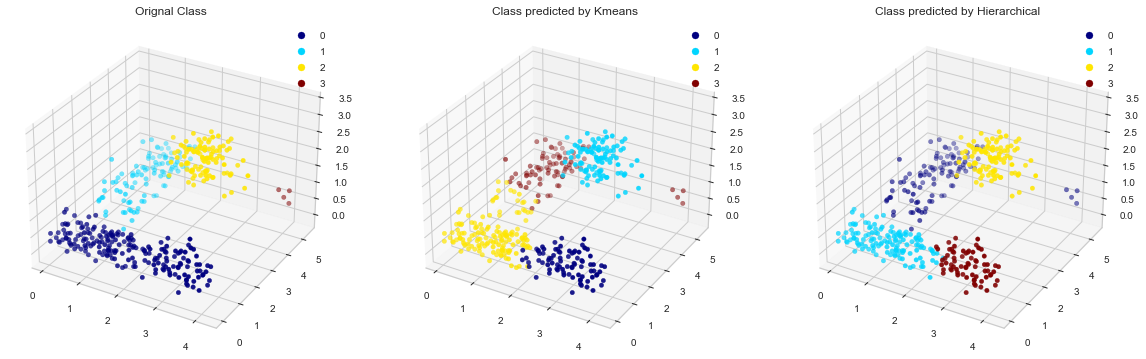

df_3
***********************************************************************************************************************

                                      Evaluating K_Means model

***********************************************************************************************************************

                                 External Validation: Matching set


Confusion_matrix:           
 [[  0   0   0   0   0]
 [  0   0   0 100   0]
 [100   0   0   0   0]
 [  0   0 100   0   0]
 [  0 100   0   0   0]]

Multilabel_Confusion_Matrix:
 [[[300. 100.]
  [  0.   0.]]

 [[200. 100.]
  [100.   0.]]

 [[200. 100.]
  [100.   0.]]

 [[200. 100.]
  [100.   0.]]

 [[300.   0.]
  [100.   0.]]]

Purity_score:             1.0
Precision_score:          0.0
Recall_score:             0.0
Accuracy score:           0.0
F_Measure:                0.0


                              External Validation: Peer to peer corelation


Jaccard_score:            0.0
Rand_score:               1.0
Fow

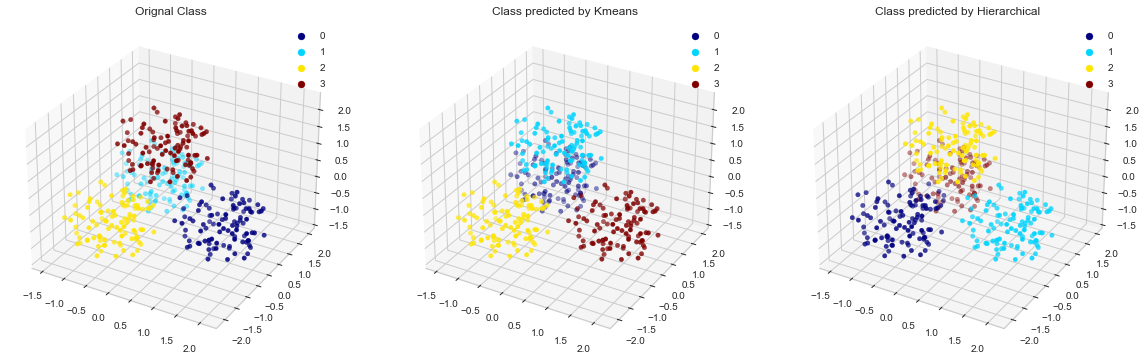

df_4
***********************************************************************************************************************

                                      Evaluating K_Means model

***********************************************************************************************************************

                                 External Validation: Matching set


Confusion_matrix:           
 [[  0   0   0]
 [173 327   0]
 [326 174   0]]

Multilabel_Confusion_Matrix:
 [[[501 499]
  [  0   0]]

 [[326 174]
  [173 327]]

 [[500   0]
  [500   0]]]

Purity_score:             0.653
Precision_score:          0.327
Recall_score:             0.327
Accuracy score:           0.327
F_Measure:                0.327


                              External Validation: Peer to peer corelation


Jaccard_score:            0.1954572624028691
Rand_score:               0.5463643643643644
Fowlkes_Mallows_score:    0.5459107296389125
************************************************************

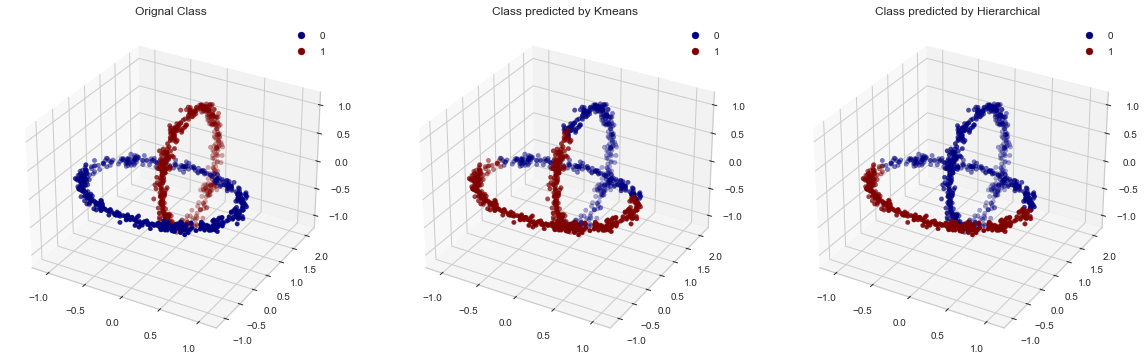

df_5
***********************************************************************************************************************

                                      Evaluating K_Means model

***********************************************************************************************************************

                                 External Validation: Matching set


Confusion_matrix:           
 [[  0   0   0]
 [226 174   0]
 [400   0   0]]

Multilabel_Confusion_Matrix:
 [[[174 626]
  [  0   0]]

 [[400   0]
  [226 174]]

 [[400   0]
  [400   0]]]

Purity_score:             0.7175
Precision_score:          0.2175
Recall_score:             0.2175
Accuracy score:           0.2175
F_Measure:                0.2175


                              External Validation: Peer to peer corelation


Jaccard_score:            0.12201963534361851
Rand_score:               0.5941051314142678
Fowlkes_Mallows_score:    0.6559262338078193
******************************************************

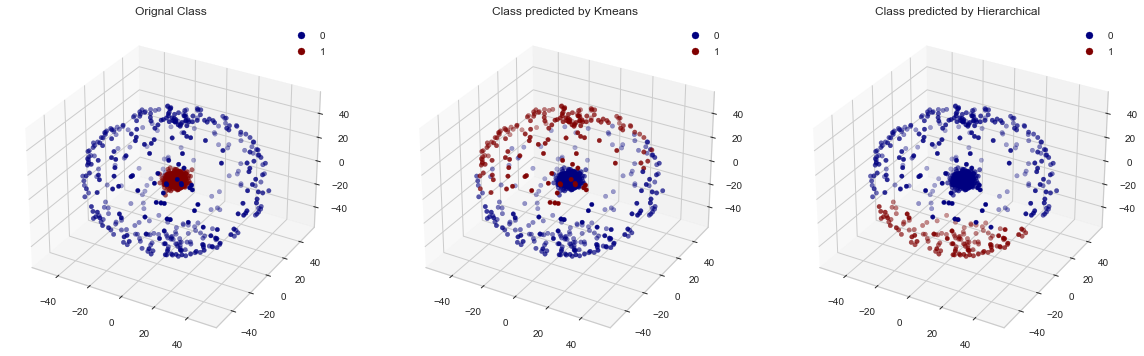

df_6
***********************************************************************************************************************

                                      Evaluating K_Means model

***********************************************************************************************************************

                                 External Validation: Matching set


Confusion_matrix:           
 [[   0    0    0]
 [  46 2002    0]
 [1895  153    0]]

Multilabel_Confusion_Matrix:
 [[[2155 1941]
  [   0    0]]

 [[1895  153]
  [  46 2002]]

 [[2048    0]
  [2048    0]]]

Purity_score:             0.951416015625
Precision_score:          0.48876953125
Recall_score:             0.48876953125
Accuracy score:           0.48876953125
F_Measure:                0.48876953125


                              External Validation: Peer to peer corelation


Jaccard_score:            0.32342487883683363
Rand_score:               0.907530262706044
Fowlkes_Mallows_score:    0.907634645408638

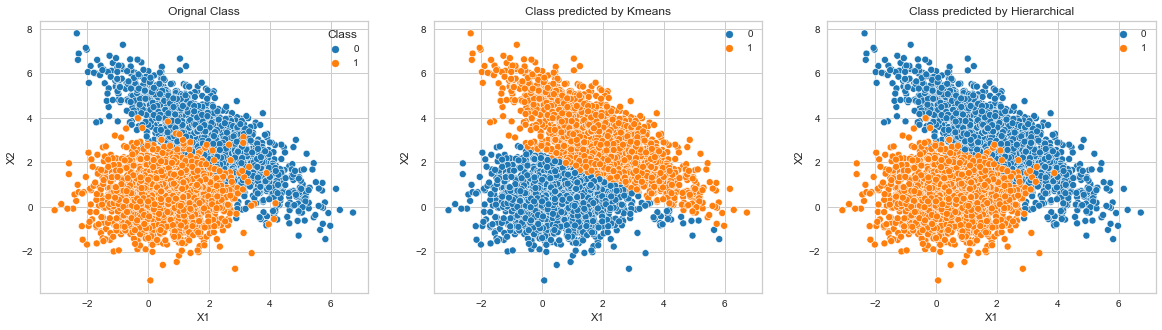

df_7
***********************************************************************************************************************

                                      Evaluating K_Means model

***********************************************************************************************************************

                                 External Validation: Matching set


Confusion_matrix:           
 [[  0   0   0   0   0   0   0]
 [395   0   0   0   0   0   0]
 [  0  86  76  71  75  55   0]
 [  0   0   0   0   3   0   0]
 [  0   3   0   0   0   0   0]
 [  0   0   3   0   0   0   0]
 [  0   0   0   0   0   3   0]]

Multilabel_Confusion_Matrix:
 [[[375 395]
  [  0   0]]

 [[286  89]
  [395   0]]

 [[404   3]
  [287  76]]

 [[696  71]
  [  3   0]]

 [[689  78]
  [  3   0]]

 [[709  58]
  [  3   0]]

 [[767   0]
  [  3   0]]]

Purity_score:             0.9844155844155844
Precision_score:          0.0987012987012987
Recall_score:             0.0987012987012987
Accuracy score:        

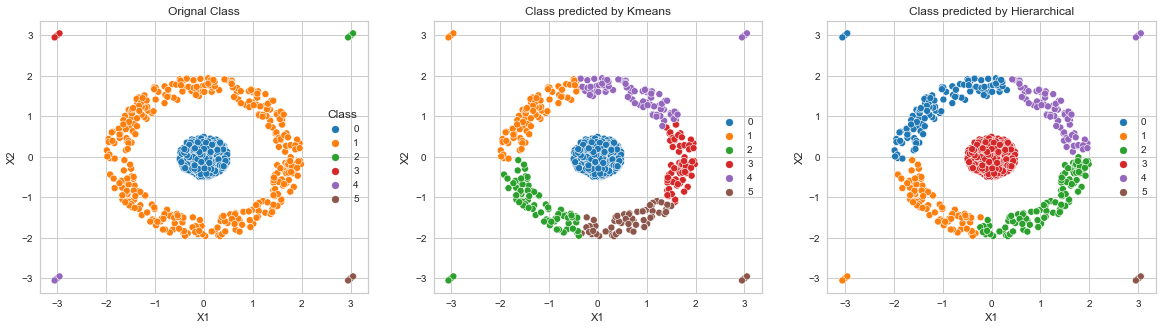

df_8
***********************************************************************************************************************

                                      Evaluating K_Means model

***********************************************************************************************************************

                                 External Validation: Matching set


Confusion_matrix:           
 [[   0    0]
 [4002    0]]

Multilabel_Confusion_Matrix:
 [[[   0. 4002.]
  [   0.    0.]]

 [[   0.    0.]
  [4002.    0.]]]

Purity_score:             1.0
Precision_score:          0.0
Recall_score:             0.0
Accuracy score:           0.0
F_Measure:                0.0


                              External Validation: Peer to peer corelation


Jaccard_score:            0.0
Rand_score:               1.0
Fowlkes_Mallows_score:    1.0
***********************************************************************************************************************

                       

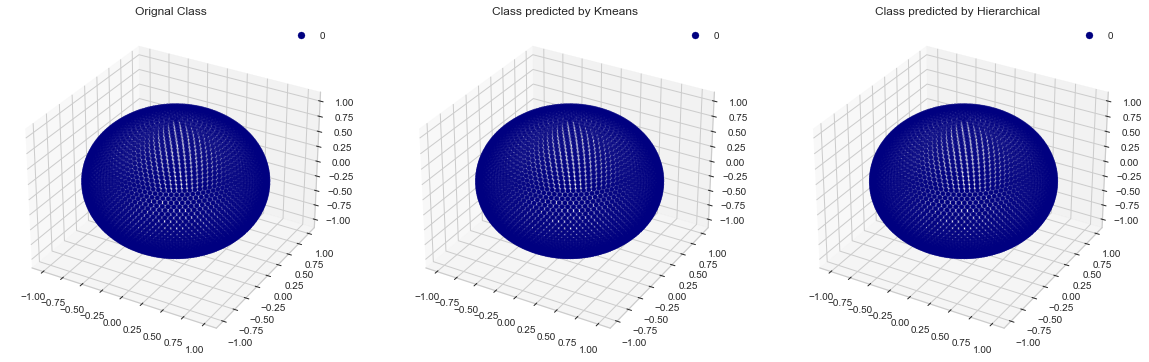

In [62]:
j = 1
for i in [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8]:
    print('df_'+str(j))
    print('***********************************************************************************************************************')
    print('\n                                      Evaluating K_Means model\n')
    print('***********************************************************************************************************************')
    Evaluation(i, K_Means(i))
    print('***********************************************************************************************************************')
    print('\n                                      Evaluating Hierarchical model\n')
    print('***********************************************************************************************************************')
    Evaluation(i, Hierarchical(i))
    plot(i)
    j = j + 1 

Here we haven't mapped the predicted classes with actual classes in given dataset. Hence evaluation metrics reported can not be presented with 100% confidence.

## Task 2

In [ ]:
from google.colab import files
uploaded = files.upload()

Importing and reading World Indicators dataset

In [24]:
world_indicators = pd.read_csv('World Indicators.csv')

In [25]:
world_indicators.describe(include='all')

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
count,199.000000,181,181.000000,1.360000e+02,188,185.000000,185,180.000000,188.000000,199.000000,131.000000,197.000000,197.000000,196.000000,191.000000,191.000000,191.000000,206.000000,208,208
unique,NaN,152,NaN,NaN,188,NaN,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,208
top,NaN,40.0%,NaN,NaN,"$199,070,864,638",NaN,$62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,Algeria
freq,NaN,3,NaN,NaN,1,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1
mean,0.021759,NaN,30.331492,9.223794e+04,NaN,0.067362,NaN,279.283333,0.027340,0.376884,0.122588,72.746193,68.035533,0.958673,0.286963,0.635550,0.077424,0.576728,NaN,NaN
std,0.010721,NaN,56.584357,3.125758e+05,NaN,0.028462,NaN,247.783296,0.025358,0.284034,0.079495,10.091750,8.868297,0.431784,0.107775,0.071489,0.052995,0.244372,NaN,NaN
min,0.008000,NaN,1.000000,7.650000e+02,NaN,0.017000,NaN,12.000000,0.002000,0.000000,0.005000,45.000000,45.000000,0.000000,0.119000,0.475000,0.003000,0.089000,NaN,NaN
25%,0.012000,NaN,9.000000,5.699000e+03,NaN,0.047000,NaN,151.750000,0.007000,0.100000,0.074500,67.000000,62.000000,0.700000,0.189000,0.581000,0.034000,0.377750,NaN,NaN
50%,0.019000,NaN,18.000000,1.808200e+04,NaN,0.065000,NaN,224.000000,0.016000,0.400000,0.106000,76.000000,70.000000,1.000000,0.279000,0.654000,0.056000,0.571500,NaN,NaN
75%,0.028000,NaN,35.000000,5.155725e+04,NaN,0.085000,NaN,327.000000,0.042250,0.600000,0.150000,80.000000,75.000000,1.200000,0.382500,0.684500,0.118000,0.772500,NaN,NaN


In [26]:
world_indicators.info()  #checking datatype and non-null count of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

In [27]:
world_indicators

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


Cleaning the data

In [28]:
# custom function for cleaning the data
def cleaning(DataFrame):
    df = DataFrame.copy()
    
    df.drop(columns=['Energy Usage','Lending Interest'],axis=1, inplace=True)
    df['Business Tax Rate'] = df['Business Tax Rate'].str.replace('%','').astype('float')
    df['GDP'] = df['GDP'].str.replace(',','').str.replace('$','',regex=True).astype('float')
    df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace(',','').str.replace('$','',regex=True).astype('float')
    ['Africa', 'Asia', 'Europe', 'Middle East', 'Oceania', 'The Americas']
    [0,1,2,3,4,5]
    df['Region'] = df.Region.astype('category').cat.codes
    return df
cleaning(world_indicators)

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,0,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,0,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,0,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,0,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,0,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,5,Turks and Caicos Islands
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,5,United States
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,5,Uruguay
206,0.020,62.8,141.0,3.164822e+11,0.045,487.0,864.0,0.014,0.4,77.0,71.0,1.0,0.291,0.651,0.058,0.888,5,"Venezuela, RB"


In [29]:
cleaning(world_indicators).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    float64
 2   Days to Start Business  181 non-null    float64
 3   GDP                     188 non-null    float64
 4   Health Exp % GDP        185 non-null    float64
 5   Health Exp/Capita       185 non-null    float64
 6   Hours to do Tax         180 non-null    float64
 7   Infant Mortality Rate   188 non-null    float64
 8   Internet Usage          199 non-null    float64
 9   Life Expectancy Female  197 non-null    float64
 10  Life Expectancy Male    197 non-null    float64
 11  Mobile Phone Usage      196 non-null    float64
 12  Population 0-14         191 non-null    float64
 13  Population 15-64        191 non-null    float64
 14  Population 65+          191 non-null    fl

In [30]:
cleaning(world_indicators).describe(include='all')

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
count,199.000000,181.000000,181.000000,1.880000e+02,185.000000,185.000000,180.000000,188.000000,199.000000,197.000000,197.000000,196.000000,191.000000,191.000000,191.000000,206.000000,208.000000,208
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,0.021759,44.643094,30.331492,3.767045e+11,0.067362,1094.464865,279.283333,0.027340,0.376884,72.746193,68.035533,0.958673,0.286963,0.635550,0.077424,0.576728,2.182692,NaN
std,0.010721,35.988948,56.584357,1.397271e+12,0.028462,1881.466019,247.783296,0.025358,0.284034,10.091750,8.868297,0.431784,0.107775,0.071489,0.052995,0.244372,1.861195,NaN
min,0.008000,8.400000,1.000000,1.707000e+08,0.017000,12.000000,12.000000,0.002000,0.000000,45.000000,45.000000,0.000000,0.119000,0.475000,0.003000,0.089000,0.000000,NaN
25%,0.012000,30.200000,9.000000,6.919676e+09,0.047000,87.000000,151.750000,0.007000,0.100000,67.000000,62.000000,0.700000,0.189000,0.581000,0.034000,0.377750,0.000000,NaN
50%,0.019000,38.800000,18.000000,2.698363e+10,0.065000,311.000000,224.000000,0.016000,0.400000,76.000000,70.000000,1.000000,0.279000,0.654000,0.056000,0.571500,2.000000,NaN
75%,0.028000,48.400000,35.000000,2.027246e+11,0.085000,928.000000,327.000000,0.042250,0.600000,80.000000,75.000000,1.200000,0.382500,0.684500,0.118000,0.772500,4.000000,NaN


In [31]:
[(x+': '+str(int(sum(cleaning(world_indicators)[x].notnull())/208*100))+'% data') for x in cleaning(world_indicators).columns.unique()] #checking for percentage of non null values in each column 

['Birth Rate: 95% data',
 'Business Tax Rate: 87% data',
 'Days to Start Business: 87% data',
 'GDP: 90% data',
 'Health Exp % GDP: 88% data',
 'Health Exp/Capita: 88% data',
 'Hours to do Tax: 86% data',
 'Infant Mortality Rate: 90% data',
 'Internet Usage: 95% data',
 'Life Expectancy Female: 94% data',
 'Life Expectancy Male: 94% data',
 'Mobile Phone Usage: 94% data',
 'Population 0-14: 91% data',
 'Population 15-64: 91% data',
 'Population 65+: 91% data',
 'Population Urban: 99% data',
 'Region: 100% data',
 'Country: 100% data']

Data Imputation

In [32]:
cleaning(world_indicators).interpolate(method='linear')  #filling missing values

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.10,72.0,69.0,0.90,0.272,0.6810,0.047,0.682,0,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.10,53.0,50.0,0.50,0.477,0.4990,0.024,0.409,0,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.00,60.0,58.0,0.80,0.432,0.5390,0.029,0.423,0,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.10,46.0,47.0,1.50,0.340,0.6250,0.035,0.565,0,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.00,56.0,55.0,0.50,0.458,0.5170,0.025,0.265,0,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.014,37.8,23.0,7.778738e+12,0.115,4701.0,198.5,0.013,0.65,77.0,71.0,1.15,0.202,0.6885,0.109,0.907,5,Turks and Caicos Islands
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.70,81.0,76.0,0.90,0.197,0.6690,0.133,0.809,5,United States
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.50,80.0,73.0,1.40,0.223,0.6380,0.139,0.946,5,Uruguay
206,0.020,62.8,141.0,3.164822e+11,0.045,487.0,864.0,0.014,0.40,77.0,71.0,1.00,0.291,0.6510,0.058,0.888,5,"Venezuela, RB"


In [ ]:
#scaler = preprocessing.MinMaxScaler()
#ndf = pd.DataFrame(scaler.fit_transform(cleaning(df).interpolate(method='linear').iloc[:,:-1]), columns = df.columns[:-1])

In [33]:
# custom function for normalizing the data
def normalize(df):
    result = df.copy()
    for column_name in df.columns:
        max_value = df[column_name].max()
        min_value = df[column_name].min()
        result[column_name] = (df[column_name] - min_value) / (max_value - min_value)
    return result

In [34]:
#normalizing the data
world_indicators_normalized = normalize(cleaning(world_indicators).interpolate(method='linear').iloc[:,:-1])

In [35]:
world_indicators_normalized

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region
0,0.404762,0.192319,0.034632,0.012804,0.16875,0.022332,0.169629,0.190909,0.111111,0.642857,0.666667,0.36,0.402632,0.539267,0.188034,0.650933,0.0
1,0.904762,0.132144,0.093795,0.006692,0.10625,0.016774,0.104328,0.954545,0.111111,0.190476,0.138889,0.20,0.942105,0.062827,0.089744,0.351262,0.0
2,0.690476,0.173874,0.040404,0.000459,0.17500,0.002223,0.099691,0.527273,0.000000,0.357143,0.361111,0.32,0.823684,0.167539,0.111111,0.366630,0.0
3,0.380952,0.033565,0.085137,0.000973,0.21875,0.039612,0.054096,0.336364,0.111111,0.023810,0.055556,0.60,0.581579,0.392670,0.136752,0.522503,0.0
4,0.809524,0.106138,0.017316,0.000658,0.29375,0.002728,0.099691,0.600000,0.000000,0.261905,0.277778,0.20,0.892105,0.109948,0.094017,0.193194,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.142857,0.088902,0.031746,0.500757,0.61250,0.473828,0.072063,0.100000,0.722222,0.761905,0.722222,0.46,0.218421,0.558901,0.452991,0.897914,1.0
204,0.119048,0.115210,0.005772,1.000000,1.00000,0.854386,0.067620,0.036364,0.777778,0.857143,0.861111,0.36,0.205263,0.507853,0.555556,0.790340,1.0
205,0.166667,0.101300,0.008658,0.003030,0.44375,0.121362,0.125193,0.072727,0.555556,0.833333,0.777778,0.56,0.273684,0.426702,0.581197,0.940724,1.0
206,0.285714,0.164500,0.202020,0.020363,0.17500,0.047999,0.329212,0.109091,0.444444,0.761905,0.722222,0.40,0.452632,0.460733,0.235043,0.877058,1.0


Internal Validation

In [36]:
# performing internal validation for both hierarchial and Kmeans clustering 
ValidClust( k = [2,3,4,5,6,7,8], methods = ['hierarchical', 'kmeans'] ).fit_predict(world_indicators_normalized) 

2           3           4           5  \
method       index                                                        
hierarchical silhouette    0.392479    0.274638    0.282383    0.276349   
             calinski    148.362032  130.966165  119.804695  108.051030   
             davies        0.844051    1.259469    1.212708    1.262585   
             dunn          0.197944    0.170094    0.170094    0.138065   
kmeans       silhouette    0.399119    0.321210    0.299701    0.295342   
             calinski    184.205352  143.418420  127.839036  113.776829   
             davies        0.973903    1.238690    1.168166    1.206132   
             dunn          0.141233    0.141233    0.137553    0.132303   

                                  6          7          8  
method       index                                         
hierarchical silhouette    0.248867   0.260472   0.264551  
             calinski     98.187553  89.016580  81.370336  
             davies        1.265726   1.264290   1.229272  
             dunn          0.138065   0.138065   0.138065  
kmeans       silhouette    0.277152   0.226216   0.226226  
             calinski    104.681360  94.077065  88.762993  
             davies        1.188858   1.332668   1.337563  
             dunn          0.151070   0.111137   0.157451

Equations used for internal validation

Calinski-Harabasz coefficient

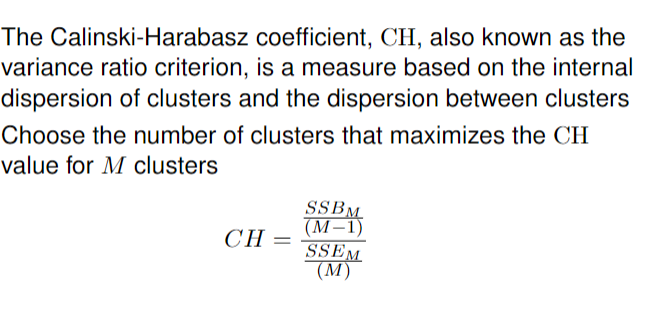

Here SSB is Group Sum of Squares

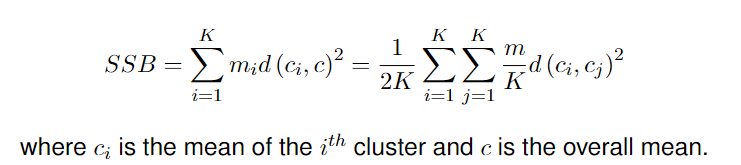

SSE is Sum of Squared Errors Within Cluster

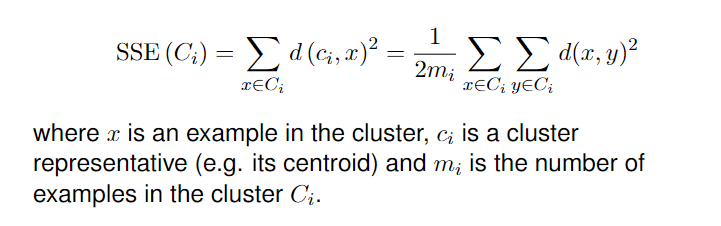

Dunn Index

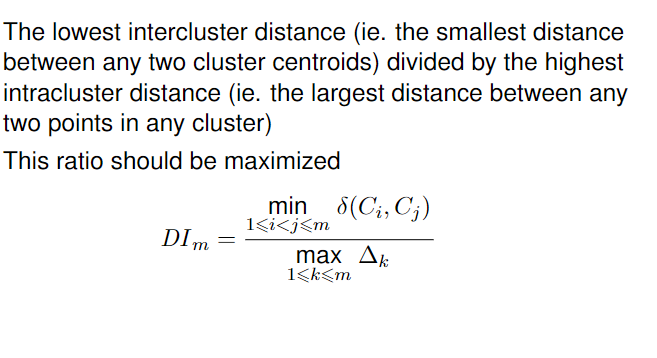

Silhouette Coefficient

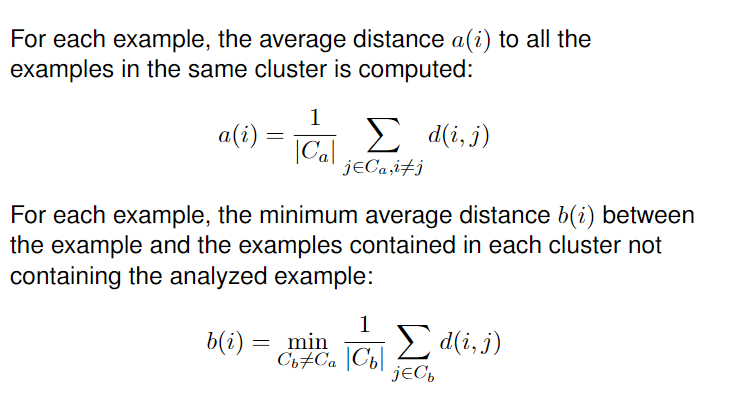

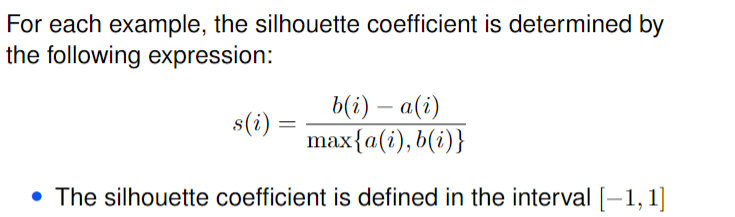

Elbow method: We see that the optimal number of clusters should be 2 from the plot below.

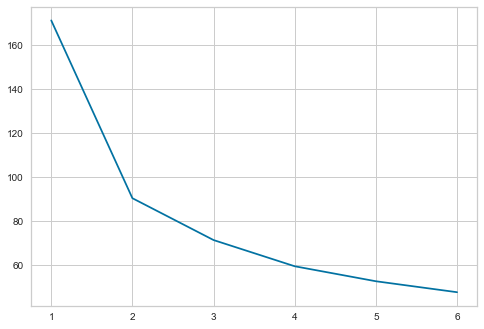

In [37]:
wcss = []

for i in range(1, 7):
    clustering = KMeans(n_clusters=i)
    clustering.fit(world_indicators_normalized)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6]
sn.lineplot(x = ks, y = wcss);

Silhouette analysis

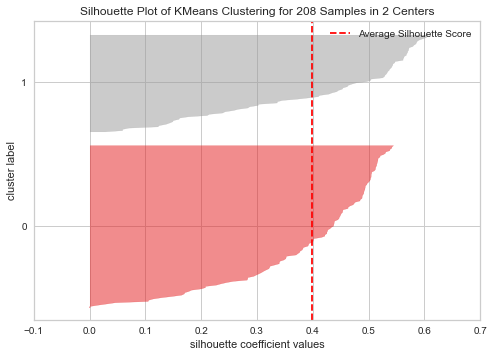

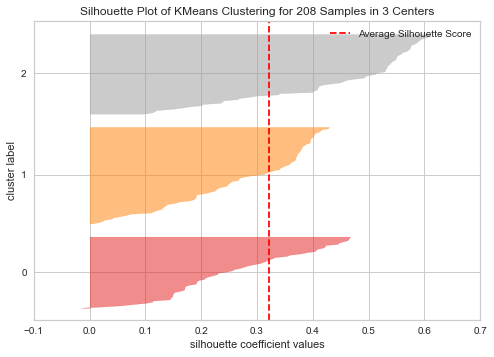

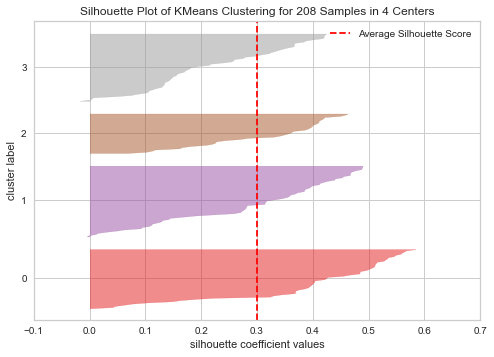

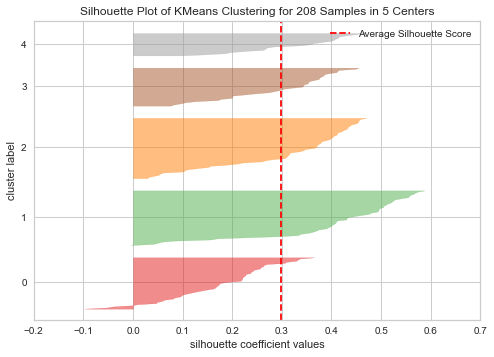

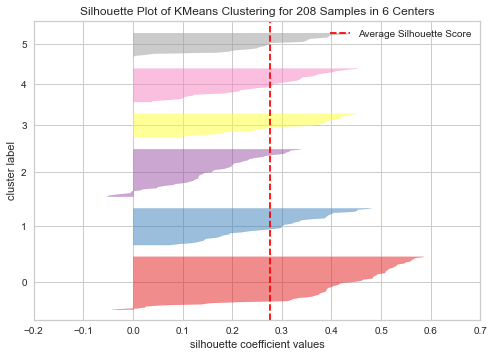

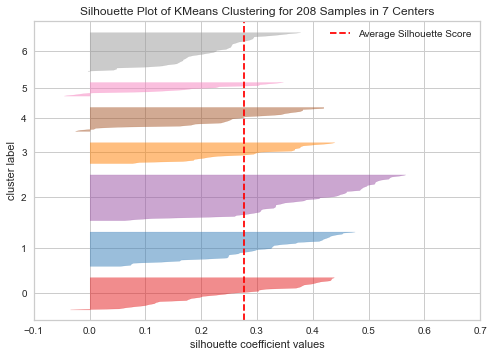

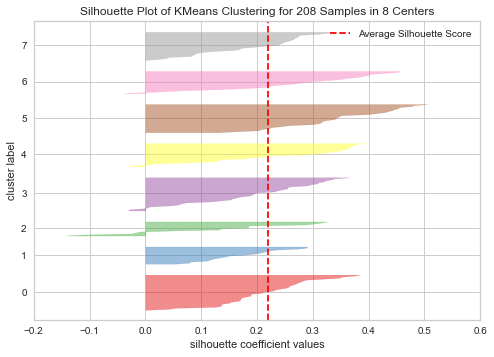

In [38]:
#performimg silhouette analysis to select optimum number of clusters
for i in range(2,9):
    model = KMeans(i)
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(world_indicators_normalized) 
    visualizer.show() 

From above analysis and internal validation score we conclude that the optimum number of clusters to be selected is 2.

Clustering using Kmeans (n=2) and printing list of countries in each group

In [39]:
# clustering similar clusters using Kmeans and listing countries belonging to each cluster
k_model = KMeans(n_clusters = 2, tol = 1e-12, n_init = 100, random_state=0).fit(world_indicators_normalized)
klabels = world_indicators
klabels['labels'] = k_model.labels_

print('\nCountries belonging to group 1\n')
print([(klabels['Country'].iloc[x]) for x in range(len(world_indicators)) if klabels.labels[x] == 1 ])
print('\n\nCountries belonging to group 0\n')
print([(klabels['Country'].iloc[x]) for x in range(len(world_indicators)) if klabels.labels[x] == 0 ])



Countries belonging to group 1

['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Bangladesh', 'Bhutan', 'Cambodia', 'India', 'Indonesia', 'Kyrgyz Republic', 'Lao PDR', 'Mongolia', 'Myanmar', 'Nepal', 'Pakistan', 'Philippines', 'Tajikistan', 'Timor-Leste', 'Turkmenistan', 'Uzbekistan', 'Iraq', 'Yemen, Rep.', 'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Papua New Guinea', 'Samoa', 'Solomon Islands', '

Dendogram: Here we can see that the optimum number of clusters is 2 from the below dendogram.

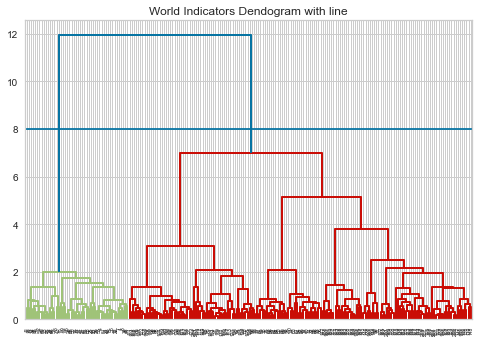

In [41]:
dend = sch.dendrogram(sch.linkage(world_indicators_normalized, method = 'ward', metric="euclidean"))
plt.title("World Indicators Dendogram with line")
clusters = sch.linkage(world_indicators_normalized, 
            method='ward', 
            metric="euclidean")
sch.dendrogram(clusters)
plt.axhline(y = 8, color = 'b', linestyle = '-')
plt.show()

Hierarchical clustering (n=2) and printing list of countries in each group

In [42]:
# clustering similar clusters using hierarchial clustering algorithm and listing countries belonging to each cluster
h_model = AgglomerativeClustering(distance_threshold = None, linkage = 'ward', n_clusters = 2).fit(world_indicators_normalized)
hlabels = world_indicators
hlabels['labels'] = h_model.labels_

print('\nCountries belonging to group 1\n')
print([(hlabels['Country'].iloc[x]) for x in range(len(world_indicators)) if hlabels.labels[x] == 1 ])
print('\n\nCountries belonging to group 0\n')
print([(hlabels['Country'].iloc[x]) for x in range(len(world_indicators)) if hlabels.labels[x] == 0 ])


Countries belonging to group 1

['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Timor-Leste']


Countries belonging to group 0

['Algeria', 'Egypt, Arab Rep.', 'Libya', 'Mauritius', 'Morocco', 'Seychelles', 'Tunisia', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Georgia', 'Hong Kong SAR, China', 'India', 'Indonesia', 'Japan', 'Kazakhstan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kyrgyz Republic', 'L

Scatterplot for Birth Rate vs Infant Mortality Rate for clusters determined by Kmeans and Hierarchical method

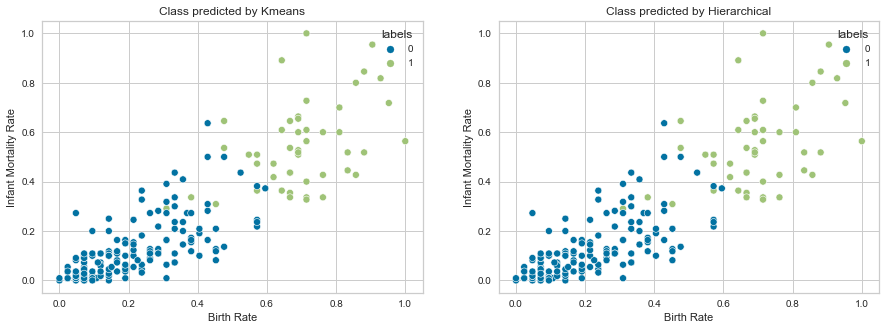

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sn.scatterplot(x = world_indicators_normalized['Birth Rate'], y = world_indicators_normalized['Infant Mortality Rate'], hue = klabels.labels, ax=axes[0]).set(title='Class predicted by Kmeans')
sn.scatterplot(x = world_indicators_normalized['Birth Rate'], y = world_indicators_normalized['Infant Mortality Rate'], hue = hlabels.labels, ax=axes[1]).set(title='Class predicted by Hierarchical')
plt.show()

Insights

For both kmeans and Hierarchical classification is similar. For cluster '0' both Birth Rate and Infant Mortality are low. For Cluster '1' both Birth Rate and Infant Mortality are high and also spread is high.

Scatterplot for Life Expectancy Male vs Life Expectancy Female for clusters determined by Kmeans

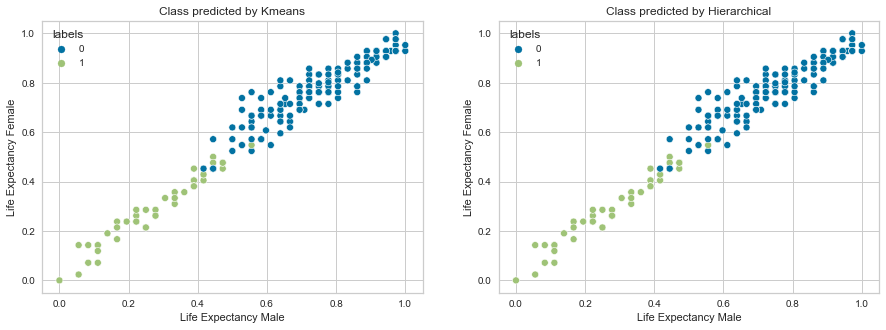

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sn.scatterplot(x = world_indicators_normalized['Life Expectancy Male'], y = world_indicators_normalized['Life Expectancy Female'], hue = klabels.labels, ax=axes[0]).set(title = 'Class predicted by Kmeans')
sn.scatterplot(x = world_indicators_normalized['Life Expectancy Male'], y = world_indicators_normalized['Life Expectancy Female'], hue = hlabels.labels, ax=axes[1]).set(title = 'Class predicted by Hierarchical')
plt.show()

For both kmeans and Hierarchical classification is similar. For cluster '0' both Life Expectancy Male and Life Expectancy Female are low. For Cluster '1' both Life Expectancy Male and Life Expectancy Female are high.

Scatterplot for Population 0-14 vs Life Population 65+ for clusters determined by Kmeans and Hierarchical method

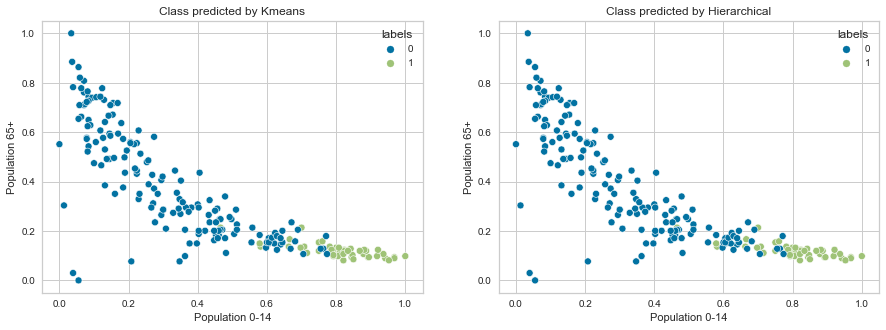

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sn.scatterplot(x = world_indicators_normalized['Population 0-14'], y = world_indicators_normalized['Population 65+'], hue = klabels.labels, ax=axes[0]).set(title='Class predicted by Kmeans')
sn.scatterplot(x = world_indicators_normalized['Population 0-14'], y = world_indicators_normalized['Population 65+'], hue = hlabels.labels, ax=axes[1]).set(title='Class predicted by Hierarchical')
plt.show()

For both kmeans and Hierarchical classification is similar. For cluster '0' both Population 0-14 and Population 65+ are low and also spread is high. For Cluster '1' both Population 0-14 and Population 65+ are high.